# Simulating `freqz` command in Matlab.

In [1]:
samprate = 44100;

# Biquad Peaking Filter (fc=1000Hz, gain=12dB, Q=2, fs=44100)
B = [1.1417, -1.9797, 0.8583];
A = [1.0356, -1.9797, 0.9644];

# calculate frequency
# (using logspace since we are going to use semilogx for plotting)
fL = 16;
fH = samprate/2;
f = logspace(log10(fL), log10(fH), 256);
ff = f / samprate * 2*pi;
s = exp.(-1.0im * ff);   # convert from digital frequency

# calculate transfer function
H = (B[1] + B[2].*s + B[3].*s.*s) ./ (A[1] + A[2].*s + A[3].*s.*s);

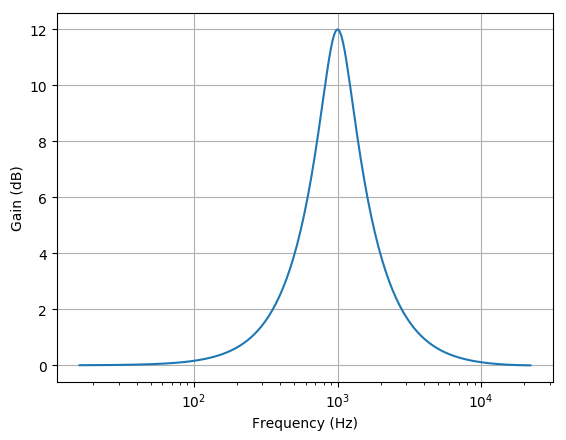

In [2]:
using PyPlot
semilogx(f, 20*log10.(abs.(H)));
grid();
xlabel("Frequency (Hz)");
ylabel("Gain (dB)");
savefig("freqz_abs.png")

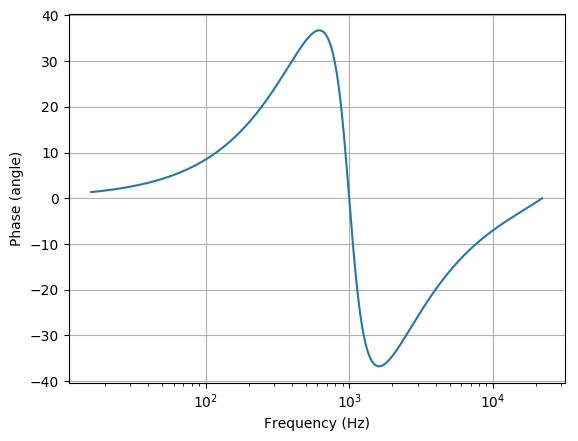

In [3]:
semilogx(f, angle.(H)*180/pi);
grid();
xlabel("Frequency (Hz)");
ylabel("Phase (angle)");
savefig("freqz_phase.png")